# Proposal

The purpose of this project is to extract the essence of the dataset and generate a new dataset (bigger and/or smaller) from this. We supposed that dataset essence is in the dataset distribution (attributes and categories) so we will generate new datasets from the `PDFs` (`PDF` by category) which will be estimated from orignal dataset using `Kernel Density Estimation`.

## Test Dataset Generation

For this proposal it will be necessary to generate a test dataset with just one feature and two categories. The purpose of this is to understand better the proposed methods.

The test dataset has 300 instances, 1 feature and 2 categories (150 instances per category).

We are looking for an univariate dataset in which exists overlap (just a little) between category distributions. To check this we will plot the generated dataset.

Figure 1: Dataset distributions by category


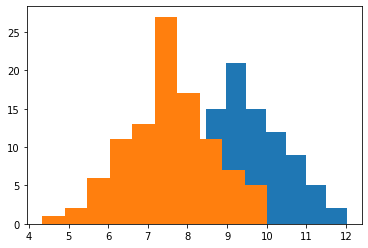

In [1]:
from kde_dataset_generator import dataset

# Dataset params
size = 200
n_categories = 2
seed = 8

# Generate df
df = dataset.generate_univariate_dataset(size, n_categories, seed)

# Plot df
print("Figure 1: Dataset distributions by category")
dataset.plot_univariate(df)


## Calculate KDEs by category

We needs to extract knowledge from dataset. To achieve this `PDFs` are estimated for each category using `KDE`.

In [2]:
from kde_dataset_generator import kde as lkde

# Caculate KDEs
kdes = lkde.calculate_kdes(df)

To make sure `PDFs` estimation are right, we plot category distributions using the previous calculated `KDEs`.

Figure 2: Dataset distributions by category using KDEs based


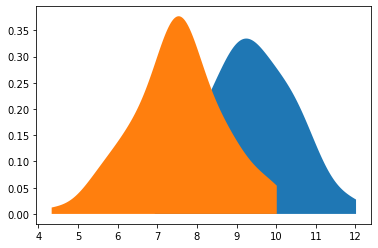

In [3]:
print("Figure 2: Dataset distributions by category using KDEs based")
lkde.plot_univariate(df, kdes)

The distributions represented in charts are the same, so we concludes that `KDEs` are right.

## The theorical method


To simplify the method analysis we will only focus on one distribution from all (one distribution per category).

We will take only values associated to category `0` and plot them.

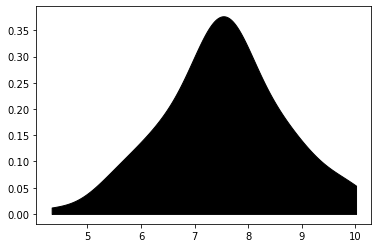

In [4]:
# Get dataset with only values associated to category 0
filtered_df = df[df.iloc[:,-1] == 0]

# Get KDE
kde = kdes[0]

# Plot dataset distribution
lkde.plot_univariate_single(filtered_df, kde)


We will generate an equally spaced support on distribution range. We can regulate support granularity increasing or decreasing amount of values which makes up the support.

The optimal amount of values depend of some dataset parameters and we will need to another project to optimize it, so we will choose this param manually. We will take enough values in range to represent the distribution correclty. This param will be `300` instances, three times more than values in distribution.

In [5]:
import numpy as np

# Get min value of the range
min = filtered_df.iloc[:,0].min()
# Get max value of the range
max = filtered_df.iloc[:,0].max()
# Gnerate support
support = np.linspace(min, max, 300)

This support will be our new dataset which looks like this.

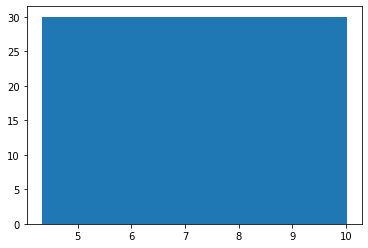

In [9]:
import pandas as pd

# Plot new distribution
dataset.plot_distribution(support)

# Define new dataset
new_df = pd.DataFrame(dict(x=support, category=np.full(300,0)))


The new dataset distribution is shaped like a rectangle and does not look like the original.

We will use the `KDE` of the original distribution to reshape this rectangle until getting the correct shape. So we will do that making a ranking by density (calculating the density for each support value using the original `KDE`) and pruning this ranking by a specific threshold.

Getting the optimal threshold requires another study, we will set a threshold that will be enough to reach the correct shape.